In [124]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
plt.style.use("dark_background")
nltk.download('punkt_tab')
nltk.download('stopwords')

df = pd.read_csv('IMDB Dataset.csv')

stop_words = set(stopwords.words('english'))
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Cleanning and Preprocessing

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
def remove_html(text):
    return re.sub(r'<[^>]+>', ' ', text)
def preprocess_review(text):
    text = text.lower()
    text = remove_html(text)
    text = remove_urls(text)
    
    tokens = word_tokenize(text)

    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if not t.isdigit()]

    return tokens


In [95]:
df['review'] = df['review'].astype(str).apply(preprocess_review)

In [ ]:
df.review.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

## Convert text to numerical

In [97]:
df['clean_text'] = df['review'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # adjust as needed

# Fit and transform
X = tfidf.fit_transform(df['clean_text'])

# Labels
y = df['sentiment']

In [98]:
df.head()

,review,sentiment,clean_text
0,"[one, reviewers, mentioned, watching, oz, epis...",1,one reviewers mentioned watching oz episode 'l...
1,"[wonderful, little, production, filming, techn...",1,wonderful little production filming technique ...
2,"[thought, wonderful, way, spend, time, hot, su...",1,thought wonderful way spend time hot summer we...
3,"[basically, 's, family, little, boy, jake, thi...",0,basically 's family little boy jake thinks 's ...
4,"[petter, mattei, 's, ``, love, time, money, ''...",1,petter mattei 's `` love time money '' visuall...


## Split the dataset to train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evalute Logistic Regression

In [100]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
y_pred = log_model.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8909


## Train and evalute Naive Bayes

In [101]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
y_pred = nb_model.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8556


## Confusion Matrix Comparison

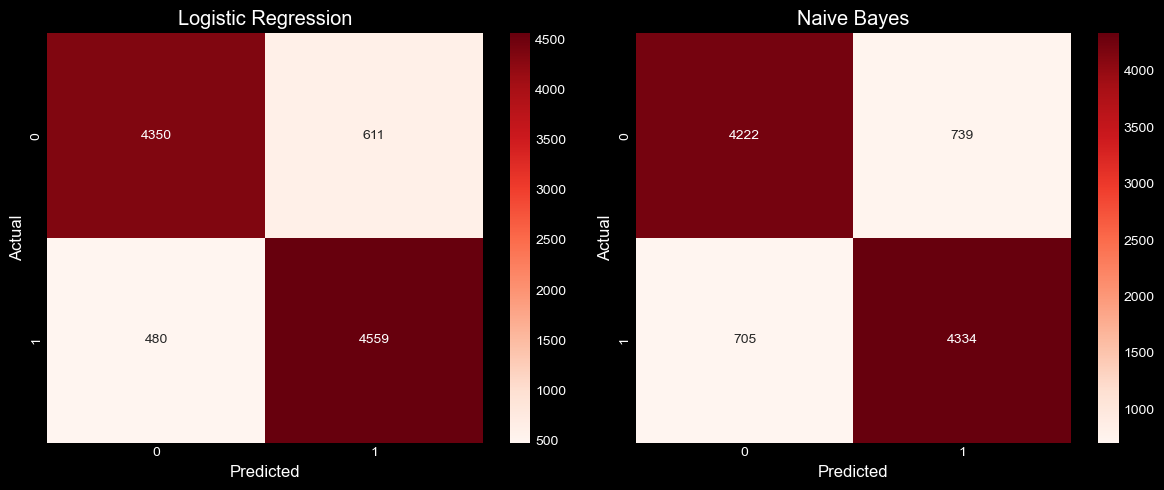

In [ ]:
def plot_confusion(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax , cmap='Reds')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plot_confusion(axes[0], y_test, log_preds, 'Logistic Regression')
plot_confusion(axes[1], y_test, nb_preds, 'Naive Bayes')
plt.tight_layout()
plt.show()


## Accuracy Comparison

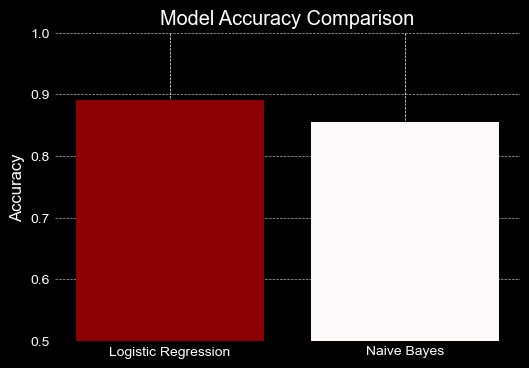

In [ ]:

acc_log = accuracy_score(y_test, log_preds)
acc_nb = accuracy_score(y_test, nb_preds)

plt.figure(figsize=(6, 4))
models = ['Logistic Regression', 'Naive Bayes']
scores = [acc_log, acc_nb]

plt.bar(models, scores, color=['darkred', 'snow'])
plt.ylim(0.5, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
